In [51]:
import pandas as pd
import numpy as np
from scipy.stats import poisson 
from matplotlib import pyplot as plt
import seaborn as sns

In [52]:
jornadas = pd.read_html('https://mexico.as.com/resultados/futbol/mls/calendario/')
jornadas[5].Resultado[12]='0 - 0'
jornadas[5].Resultado[13]='0 - 0'
jornadas[15].Resultado[14]='0 - 0'

jornadascompletas=22
j=list(range(0,jornadascompletas))

resultado_local=pd.DataFrame()
resultado_visita=pd.DataFrame()

for i in j:
    resultado=jornadas[i].Resultado.str.split("-", n = 1, expand = True).astype(int)
    resultado_local[i]=pd.Series(resultado[0])
    resultado_visita[i]=pd.Series(resultado[1])


resultado_local=resultado_local.fillna(0)
resultado_visita=resultado_visita.fillna(0)

resultado_local.to_csv('mls_resultado_local.csv')
resultado_visita.to_csv('mls_resultado_visita.csv')

equipo_local=pd.DataFrame()
equipo_visita=pd.DataFrame()

for i in list(range(0,jornadascompletas)):
    equipo_local[i]=jornadas[i]['Equipo local']
    equipo_visita[i]=jornadas[i]['Equipo visitante']

equipo_local=equipo_local.fillna(0)
equipo_visita=equipo_visita.fillna(0)
equipo_local.to_csv('mls_equipo_local.cvs',sep=',')
equipo_visita.to_csv('mls_equipo_visita.cvs',sep=',')

for i in j:
    pd.DataFrame({'equipo local':equipo_local[i],'goles local':resultado_local[i],'goles visita':resultado_visita[i],'equipo visita':equipo_visita[i]}).to_csv('mls_jornada{}.csv'.format(i),index=False)

suma_goles_local_jornada=resultado_local.sum()
suma_goles_visita_jornada=resultado_visita.sum()
suma_goles=suma_goles_local_jornada+suma_goles_visita_jornada
dif_goles=suma_goles_local_jornada-suma_goles_visita_jornada

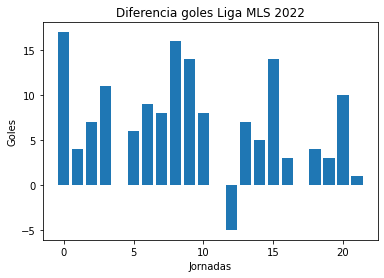

In [53]:
plt.bar(j,dif_goles)
plt.xlabel("Jornadas")
plt.ylabel("Goles")
plt.title('Diferencia goles Liga MLS 2022')
plt.savefig('mls_bars_dif.png')
plt.show()

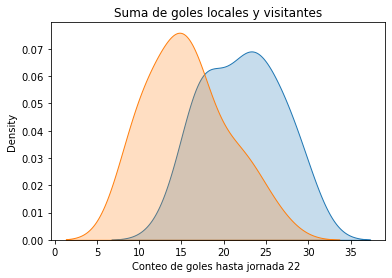

In [54]:
sns.kdeplot(data=suma_goles_local_jornada,shade=True,bw_adjust=1,legend=True)
sns.kdeplot(data=suma_goles_visita_jornada,shade=True,bw_adjust=1,legend=True)
plt.xlabel("Conteo de goles hasta jornada {} ".format(jornadascompletas))
plt.title('Suma de goles locales y visitantes')
plt.savefig('mls_distsumadegoles.png')
plt.show()

/Users/boinas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


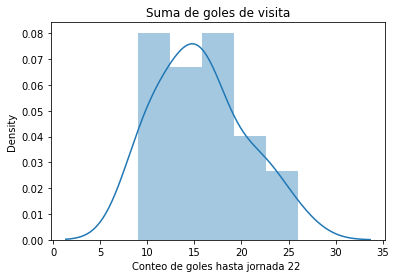

In [55]:
sns.distplot(suma_goles_visita_jornada)
plt.xlabel("Conteo de goles hasta jornada {} ".format(jornadascompletas))
plt.title('Suma de goles de visita')
plt.savefig('mls_sumalocal.png')
plt.show()

/Users/boinas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


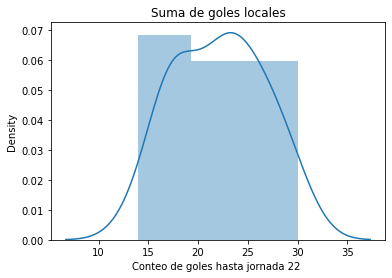

In [56]:
sns.distplot(suma_goles_local_jornada)
plt.xlabel("Conteo de goles hasta jornada {} ".format(jornadascompletas))
plt.title('Suma de goles locales')
plt.savefig('mls_sumavisitante.png')
plt.show()

/Users/boinas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


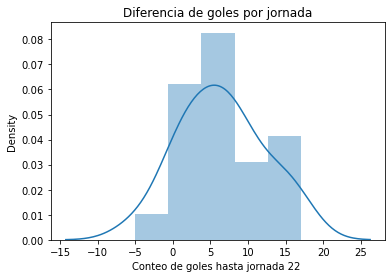

In [57]:
sns.distplot(dif_goles)
plt.xlabel("Conteo de goles hasta jornada {} ".format(jornadascompletas))
plt.title('Diferencia de goles por jornada')
plt.savefig('mls_dist_dif.png')
plt.show()

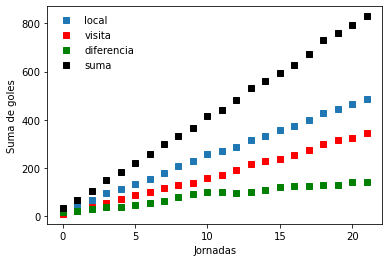

In [58]:
local_cumulativo=np.array(suma_goles_local_jornada)
visita_cumulativo=np.array(suma_goles_visita_jornada)
plt.plot(np.cumsum(local_cumulativo),'s',label='local')
plt.plot(np.cumsum(visita_cumulativo),'rs',label='visita')
plt.plot(np.cumsum(local_cumulativo-visita_cumulativo),'gs',label='diferencia')
plt.plot(np.cumsum(local_cumulativo+visita_cumulativo),'ks',label='suma')
plt.legend(loc='upper left', prop={'size': 10}, frameon=False)
plt.xlabel('Jornadas')
plt.ylabel('Suma de goles')
plt.savefig('mls_cumulativo.png')
plt.show()